## 파일불러온 후 spilt

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('C:/Users/lucky/바탕 화면/Capstone-Design/processed_data_2.xlsx',header=0)

In [3]:
data

,mod_d,region,town_t,apt_t,psu,sex,age,incm,ho_incm,incm5,...,LS_1YR,LK_EDU,LK_LB_CO,LK_LB_US,LK_LB_IT,LK_LB_EF,LF_secur_y,LF_BUYER,LF_SAFE,target
0,2020.03.05.,1,1,2,A901,1,80,1,1,2,...,1,2,1,2,88,8,1,2,1,저
1,2020.03.05.,1,1,2,A901,1,78,4,4,5,...,1,2,2,8,88,8,1,1,1,고
2,2020.03.05.,1,1,2,A901,2,75,4,4,5,...,2,2,2,8,88,8,1,1,1,고
3,2020.03.05.,1,1,2,A901,2,80,2,1,2,...,1,2,2,8,88,8,1,1,1,고
4,2020.03.05.,1,1,2,A901,2,71,1,1,2,...,2,1,2,8,88,8,1,1,1,저
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6073,2020.03.05.,8,1,2,R904,1,1,3,3,4,...,1,3,3,8,88,8,1,1,1,저
6074,2020.03.05.,8,1,2,R904,2,73,2,1,2,...,2,2,1,2,88,8,1,1,1,저
6075,2020.03.05.,8,1,2,R904,1,43,3,4,4,...,2,2,1,2,88,8,1,1,2,고
6076,2020.03.05.,8,1,2,R904,1,10,3,4,4,...,2,2,2,8,88,8,1,1,2,고


In [4]:
data.drop(['mod_d'], axis='columns', inplace=True)

In [5]:
data.drop(['psu'], axis='columns', inplace=True)

In [6]:
from sklearn.model_selection import train_test_split # train / test

In [7]:
y=data['target']
X=data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=11)
print(X_train.shape, X_test.shape)

(4862, 365) (1216, 365)


## xgboost

In [8]:
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [9]:
xgb_clf = XGBClassifier(random_state = 156)
xgb_clf.fit(X_train,y_train)
pred=xgb_clf.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, pred)

In [12]:
print('xgboost 예측 정확도 : {0:.4f}'.format(accuracy))
print('\nXGBClassifier 기본 하이퍼파라미터:\n', xgb_clf.get_params())

xgboost 예측 정확도 : 0.6965

XGBClassifier 기본 하이퍼파라미터:
 {'objective': 'multi:softprob', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 0, 'num_parallel_tree': 1, 'random_state': 156, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': None, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


### - 하이퍼파라미터 튜닝

In [13]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier()

xgb_param_grid = {
    'n_estimators' : [100,200,300,400],
    'learning_rate' : [0.01,0.05,0.1,0.15,0.2],
    'max_depth' : [4,5,6,7,8]
}

xgb_grid = GridSearchCV(xgb_clf, param_grid = xgb_param_grid, scoring="accuracy", n_jobs=-1, verbose=1)
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 85.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 96.0min finished


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [14]:
print("최고 평균 정확도 : {0:.4f}".format(xgb_grid.best_score_))
print("최고의 파라미터 : ", xgb_grid.best_params_)

최고 평균 정확도 : 0.7269
최고의 파라미터 :  {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}


In [15]:
cv_result_df = pd.DataFrame(xgb_grid.cv_results_)
cv_result_df.sort_values(by=['rank_test_score'], inplace=True)

In [16]:
cv_result_df[['params', 'mean_test_score', 'rank_test_score']].head(10)

,params,mean_test_score,rank_test_score
20,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est...",0.726861,1
3,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.724804,2
2,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.724803,3
21,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est...",0.724393,4
40,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.723981,5
24,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.723777,6
30,"{'learning_rate': 0.05, 'max_depth': 6, 'n_est...",0.722749,7
7,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.722748,8
1,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.722541,9
32,"{'learning_rate': 0.05, 'max_depth': 7, 'n_est...",0.722336,10


### - early stopping

In [28]:
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.05,max_depth=4)
evals = [(X_test, y_test)]
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="mlogloss", eval_set=evals, verbose=1)

[0]	validation_0-mlogloss:1.07120
Will train until validation_0-mlogloss hasn't improved in 100 rounds.
[1]	validation_0-mlogloss:1.04625
[2]	validation_0-mlogloss:1.02351
[3]	validation_0-mlogloss:1.00272
[4]	validation_0-mlogloss:0.98338
[5]	validation_0-mlogloss:0.96598
[6]	validation_0-mlogloss:0.94948
[7]	validation_0-mlogloss:0.93455
[8]	validation_0-mlogloss:0.92078
[9]	validation_0-mlogloss:0.90754
[10]	validation_0-mlogloss:0.89567
[11]	validation_0-mlogloss:0.88480
[12]	validation_0-mlogloss:0.87434
[13]	validation_0-mlogloss:0.86487
[14]	validation_0-mlogloss:0.85560
[15]	validation_0-mlogloss:0.84735
[16]	validation_0-mlogloss:0.83955
[17]	validation_0-mlogloss:0.83232
[18]	validation_0-mlogloss:0.82547
[19]	validation_0-mlogloss:0.81946
[20]	validation_0-mlogloss:0.81367
[21]	validation_0-mlogloss:0.80822
[22]	validation_0-mlogloss:0.80331
[23]	validation_0-mlogloss:0.79874
[24]	validation_0-mlogloss:0.79433
[25]	validation_0-mlogloss:0.79042
[26]	validation_0-mlogloss:0.7

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## feature importance

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

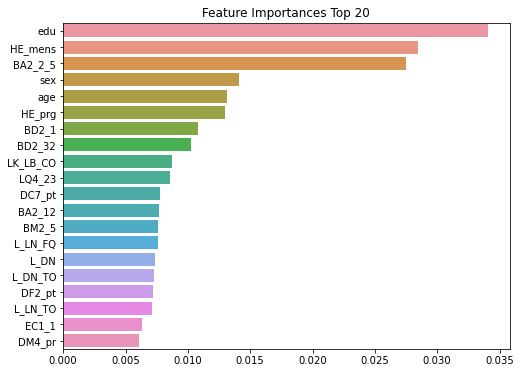

In [25]:
feature_importance_values = xgb_clf.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
feature_top20 = feature_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 20')
sns.barplot(x=feature_top20, y=feature_top20.index)
plt.show()